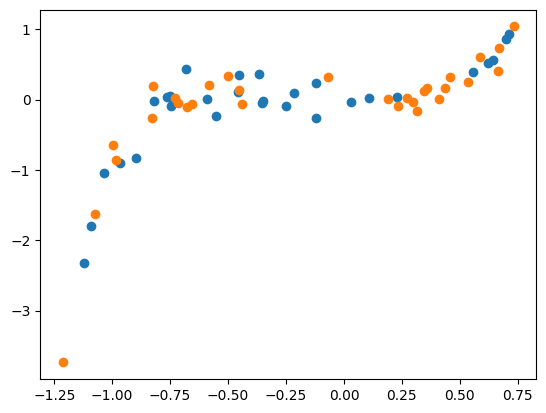

In [156]:
import numpy as np
import matplotlib.pyplot as plt

n = 30
poly_deg = 5

def f(x):
    return 3*np.power(x,poly_deg) + 2*np.power(x,poly_deg-1) + np.random.randn(len(x))/6

x = 2*np.random.rand(n) - 1.25
y = f(x)

x_test = 2*np.random.rand(n) - 1.25
y_test = f(x_test)

plt.scatter(x,y)
plt.scatter(x_test,y_test)

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def make_model(X,Y,deg=2, display=True):
    # Identify the polynomial features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1,1))

    # Create the model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, Y)

    if display:
        print(lin_reg.intercept_,lin_reg.coef_)
        plt.scatter(X,y)
        x_line = np.linspace(X.min(), X.max(), 100)
        y_line = lin_reg.intercept_
        for i in range(len(lin_reg.coef_)):
            y_line += lin_reg.coef_[i] * np.power(x_line, i+1)

        plt.plot(x_line,y_line, color='green')
        plt.show()

    return lin_reg.intercept_, lin_reg.coef_

def predict_model(X,Y,intercept,coef):
    y_pred = intercept
    for i in range(len(coef)):
        y_pred += coef[i] * np.power(X,i+1)
    rmse = np.sqrt(np.sum((y_pred - Y)**2) / len(Y))
    # print(f"RMSE = {rmse}")
    return rmse

0.4284749805275229 [ 0.60684803 -0.77348359]


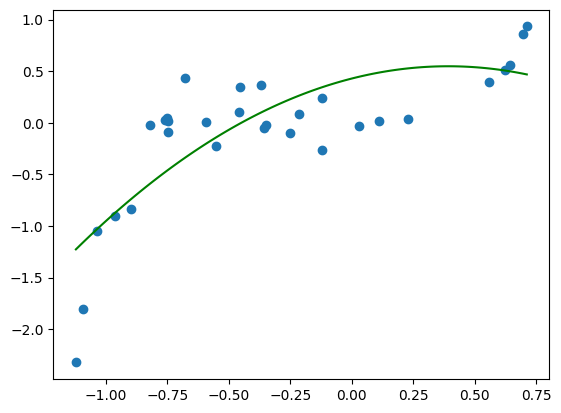

np.float64(0.5809743168343143)

In [158]:
#######  Quadratic Regression (power of 2)  ##########
int,coef = make_model(x,y,2)
predict_model(x_test,y_test,int,coef)

-0.09268188068771127 [-0.80884888  1.11520264  2.96059829]


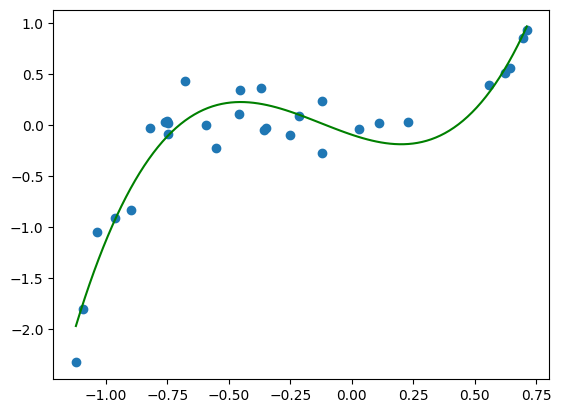

np.float64(0.27364227382127265)

In [159]:
#######  Cubic Regression (power of 3)  ##########
int,coef = make_model(x,y,3)
predict_model(x_test,y_test,int,coef)

-0.08290859341382484 [-0.11123566  1.88725491  1.26670229 -1.73842674]


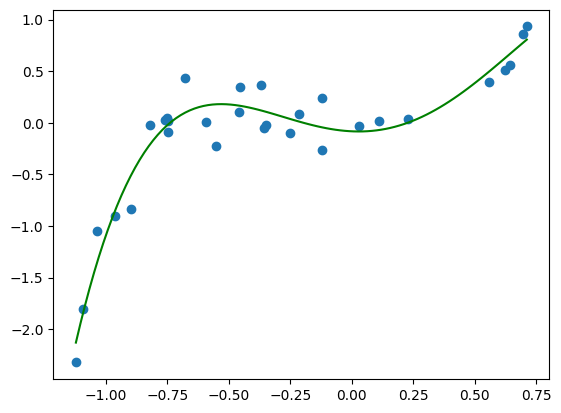

np.float64(0.20740436548072896)

In [160]:
#######  Regression with power of 4  ##########
int,coef = make_model(x,y,4)
predict_model(x_test,y_test,int,coef)

-0.012176068465313133 [  0.28015109   0.6938395   -3.92260085  -0.81842614  14.71805518
   6.55562794 -11.25348378  -7.61093584]


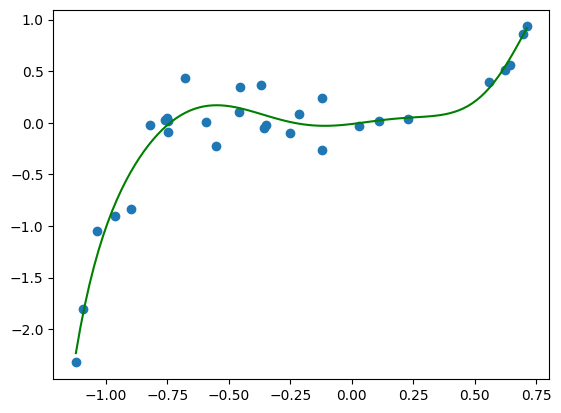

np.float64(0.17715719225414697)

In [161]:
int,coef = make_model(x,y,8)
predict_model(x_test,y_test,int,coef)

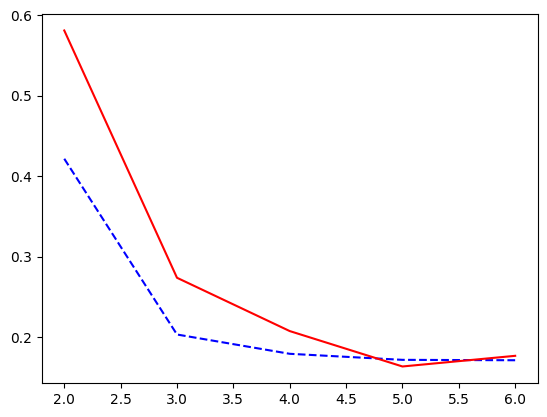

In [162]:
rmse_train = []
rmse_test = []
highest_power = 7

for i in np.arange(2,highest_power):
    int,coef = make_model(x,y,i, display=False)
    rmse_train.append(predict_model(x,y,int,coef))    
    rmse_test.append(predict_model(x_test,y_test,int,coef))

plt.plot(np.arange(2,highest_power), rmse_train, color='blue', linestyle='dashed', label='Train RMSE')
plt.plot(np.arange(2,highest_power), rmse_test, color='red', label='Test RMSE')
plt.show()